**Bibliometrix Analysis in R**

This notebook documents a novel workflow for performing bibliometric analysis of any scientific topic. It relies on the Bibliometrix-R package to compile bibliographic information from diverse search engines, and cleans the information through the *Python-Notebook Bibliometrix*, returning diverse outputs.  

----

**General WorkFlow**  

Download bibliographic files  
*Out -> .BibTeX*

Python-Notebook:
1. Import libraries
2. Create working Folders  

R-Notebook
1. Import libraries
2. Database compilation  
*Out -> “db_r_to_py.csv”*


Python-Notebook:
1. Cleaning  
*Out -> "db_py_to_r.csv"*


Outputs  
I) R-Notebook
1. Sankeys
2. Networks (move with python)
3. Co-word analysis
4. Thematic evolution


II) Python-Notebook
1. Zotero
2. Move Networks
3. Annual scientific production


https://en.wikipedia.org/wiki/Network_science#Node_centrality
https://en.wikipedia.org/wiki/Centrality#Eigenvector_centrality
Density: Ratio of the number of edges to the number of possible edges.

Network Closure (Transitivity): A measure of the completeness of relational triads. An individual's assumption of network closure (i.e. that their friends are also friends) is called transitivity.

Diameter: Indicates how separated nodes are from one another and is representative of the linear size of a network. It is the shortest distance between the two most distant nodes in the network. In other words, once the shortest path length from every node to all other nodes is calculated, the diameter is the longest of all the calculated path lengths. 

Degree Centrality: Centrality indexes quantify the centrality of a node. The "importance" or "influence" (in a variety of senses) of a particular node (or group) within a network. Degree centrality specifically is defined as the number of links incident upon a node (i.e., the number of ties that a node has). The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). Different centrality indices encode different contexts for the word "importance." (i.e. connecting with important nodes or not for example).
The betweenness centrality, for example, considers a node highly important if it form bridges between many other nodes. The eigenvalue centrality, in contrast, considers a node highly important if many other highly important nodes link to it (It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. To define an absolute score one must normalise the eigenvector, e.g., such that the sum over all vertices is 1 or the total number of vertices n)


# **Importing Libraries** 
**First we execute the bibliometrix library package and set the proper direction for the working directory**

In [ ]:
library(bibliometrix)
library(ggplot2)
library(reshape2)
setwd("/Users/macadmin/Google Drive/Shared Folders/GW-ABM — Review/Bibliometric Analysis/")

# **Database Compilation**

**In this step we convert and merge the downloaded bibliographic files (.BibTex) into a single dataframe, and export it to an Excel file for cleaning in Python**

In [ ]:
# We read the BibTeX files here stored in Keywords Searches folder 
SDB <- readFiles("Keyword Searches/ABM & GW/Input Data/GWABM_SCOPUS.bib")
WDB <- readFiles("Keyword Searches/ABM & GW/Input Data/GWABM_WOS.bib")
#WDB2 <- readFiles("Keyword Searches/Floods/Input Data/loods_WOS2.bib")

In [ ]:
# Converting BibTeX to Dataframes
SDB_DF <- convert2df(SDB, dbsource = "scopus", format = "bibtex")
WDB_DF <- convert2df(WDB, dbsource = "isi", format = "bibtex")
#WDB_DF_2 <- convert2df(WDB2, dbsource = "isi", format = "bibtex")

# We merge dataframes and remove duplicates
Merged <- mergeDbSources(WDB_DF, SDB_DF, remove.duplicated=TRUE)
#Merged <- mergeDbSources(WDB_DF, SDB_DF, WDB_DF_2,remove.duplicated=TRUE)

**We also remove duplicates through the Titles field of the Dataframe**

In [ ]:
# We remove duplicates by searching through the title field
New_Merged <- duplicatedMatching(Merged, Field = "TI", tol = 0.90)
message(nrow(New_Merged), ' rows and ', ncol(New_Merged), ' columns')

**Here we extract a set of other field tags, different from the standard WoS/SCOPUS codify. These metatags are added to the Dataframe**

In [ ]:
M <- New_Merged
# Here we chek the cited references [CR] column, obtaining a ";" separator
#message(M$CR[1])  
message(nrow(M), ' rows and ', ncol(M), ' columns')

# This code retrieves FIELD TAGS (e.g. references authors) not included in the dataframe generated but still in the database and adds them as new columns
M <- metaTagExtraction(M, Field = "CR_AU", sep = ";")   # First author of each cited reference
M <- metaTagExtraction(M, Field = "CR_SO", sep = ";")   # Source of each cited reference
M <- metaTagExtraction(M, Field = "AU_CO", sep = ";")   # Country of affiliation for each co-author
M <- metaTagExtraction(M, Field = "AU1_CO", sep = ";")  # Country of affiliation for the first author
M <- metaTagExtraction(M, Field = "AU_UN", sep = ";")   # University of affiliation  for each co-author and the corresponding author
M <- metaTagExtraction(M, Field = "SR", sep = ";")      # Short tag of the document
message(nrow(M), ' rows and ', ncol(M), ' columns')

**Finally we create a .csv file for further cleaning of the database through Python**

In [ ]:
write.csv(M,'db_r_to_py.csv')

# **Database cleaning through "Python-Notebook Bibliometrix**

**The Excel file (var: db_r_to_py.csv) is now ready to be cleaned on the "Python-Notebook Bibliometrix"**

# **Reupdate of database to Bibliometrix**

In [14]:
#M <- read.csv(file = "db_py_to_r.csv")
M <- read.csv(file = "Merged DB (GW-ABM,SH,PM,TC,EM).csv")
M$DE<- as.character(M$DE)
M$SO<- as.character(M$SO)
M$AU_UN<- as.character(M$AU_UN)
M$AU_CO<- as.character(M$AU_CO)
M$AU<- as.character(M$AU)
M$AU1_CO<- as.character(M$AU1_CO)
M$AU_UN<- as.character(M$AU_UN)
M$AU_UN_NR<- as.logical(M$AU_UN_NR)
M$AU1_UN<- as.character(M$AU1_UN)
M$CR_AU<- as.character(M$CR_AU)
M$CR_SO<- as.character(M$CR_SO)
M$DT<- as.character(M$DT)
M$DT2<- as.character(M$DT2)
M$ID<- as.character(M$ID)
M$JI<- as.character(M$JI)
M$LA<- as.character(M$LA)
M$PN<- as.character(M$PN)
M$PP<- as.character(M$PP)
#M$PU<- as.character(M$PU)
M$PY<- as.numeric(M$PY)
M$RP<- as.character(M$RP)
M$SN<- as.character(M$SN)
M$AB<- as.character(M$AB)
M$DB<- as.character(M$DB)
M$CR<- as.character(M$CR)
M$SR<- as.character(M$SR)
M$AR<- as.character(M$AR)
M$C1<- as.character(M$C1)
M$DI<- as.character(M$DI)
M$SR_FULL<- as.character(M$SR_FULL)
M$TC<- as.numeric(M$TC)
M$TI<- as.character(M$TI)
M$VL<- as.character(M$VL)

#M$FU<- as.character(M$FU)
#M$BN<- as.character(M$BN)
message('Database has ', nrow(M), ' rows and ', ncol(M), ' columns')

Database has 1555 rows and 37 columns



# **Outputs**

## **Main Statistics**

In [ ]:
# The variable "results" saves the bibliographic summary (here "k" indicates how many rows will be printed in each table)
results <- biblioAnalysis(M, sep = ";")     
options(width=100)
S <- summary(object = results, k = 20, pause = FALSE)
plot(x = results, k = 40, pause = FALSE)

## **Sankey Plots**

**Interactively visualize the main items of three fields and how they are related. The larger flows (arrow widths) can be easily visualized. The width is proportional to the quantity represented. Advantages: highlight main flows**

In [ ]:
# Here "n" indicates the number of items to plot in each field, and width and height are in pixels
threeFieldsPlot(M, fields = c("SO", "DE", "AU1_CO"), n = c(641, 3989, 4682), width = 1000, height = 900)   # Authors - Author Keywords - Sources (Journal)

## **Networks** 

### **Co-occurrences of Author Keywords**

In [ ]:
NetMatrix <- biblioNetwork(M, analysis = "co-occurrences", network = "author_keywords", sep = ";")
net <- networkPlot(NetMatrix, Title="Author Keywords Co-occurrences",
                   normalize="association", type="auto", cluster="none", degree=NULL, weighted=TRUE,                #methods
                   noloops=TRUE, remove.multiple=FALSE, remove.isolates = TRUE, alpha=0.5, halo=TRUE,                   #other options
                   label=TRUE, labelsize=1, label.cex=TRUE, label.color=FALSE, label.n = 150,                            #labels
                   n = 4000, size=10, size.cex=TRUE,                                                                   #vertes/nodes 
                   edgesize=10, edges.min=1, curved = 0)                                                              #edges
net2VOSviewer(net, vos.path="Temporal Outputs/Co-occurrences")

### **Co-Citation of Authors**

In [ ]:
NetMatrix <- biblioNetwork(M, analysis = "co-citation", network = "authors", sep = ";")
net <- networkPlot( NetMatrix, Title="Authors Co-Citation Network",
                   normalize="association", type="auto", cluster="none", degree=NULL, weighted=TRUE,                #methods
                   noloops=TRUE, remove.multiple=TRUE, remove.isolates = TRUE, alpha=0.5, halo=TRUE,                   #other options
                   label=TRUE, labelsize=1, label.cex=FALSE, label.color=FALSE, label.n = 300,                            #labels
                   n=300, size=10, size.cex=TRUE,                                                                       #vertes/nodes 
                   edgesize=1, edges.min=0.5, curved = 0)
net2VOSviewer(net, vos.path="Temporal Outputs/Co-citations")

### **Bibliographic Coupling of Authors**

In [ ]:
NetMatrix <- biblioNetwork(M, analysis = "coupling", network = "authors",sep = ";", shortlabel = FALSE)
net <- networkPlot( NetMatrix, Title="Authors' Coupling",
                   normalize="association", type="auto", cluster="none", degree=NULL, weighted=TRUE,                #methods
                   noloops=TRUE, remove.multiple=TRUE, remove.isolates = TRUE, alpha=0.5, halo=TRUE,                   #other options
                   label=TRUE, labelsize=1, label.cex=FALSE, label.color=FALSE, label.n = 800,                            #labels
                   n=800, size=10, size.cex=TRUE,                                                                       #vertes/nodes 
                   edgesize=1, edges.min=0.5, curved = 0)
net2VOSviewer(net, vos.path="Temporal Outputs/Bibliographic Coupling")

### **Collaboration of Countries**

In [ ]:
# This one uses AU_CO metatag
NetMatrix <- biblioNetwork(M, analysis = "collaboration",  network = "countries", sep = ";")
net <- networkPlot( NetMatrix, Title="Country collaboration",
                   normalize="association", type="auto", cluster="none", degree=NULL, weighted=TRUE,                #methods
                   noloops=TRUE, remove.multiple=TRUE, remove.isolates = TRUE, alpha=0.5, halo=TRUE,                   #other options
                   label=TRUE, labelsize=1, label.cex=FALSE, label.color=FALSE,                            #labels
                    n = 30, size=10, size.cex=TRUE,                                                   #vertes/nodes 
                   edgesize=1, edges.min=0.5, curved = 0)                                                              #edges
net2VOSviewer(net, vos.path="Temporal Outputs/Collaborations")

### **Networks Statistics**

**Here we print the available structural properties of the network, and a short summary (showing "k" rows)**

In [ ]:
netstat <- networkStat(NetMatrix, stat = "all", type = "authority")
names(netstat$network)
summary(netstat,k=100)
# Type: "degree", "closeness", "betweenness","eigenvector","pagerank","hub","authority"

## **Data Mining**

**Here we extract terms from textual fields of a manuscript (abstract, title, author’s keywords, keywords plus). Specifically, we start with Titles**

In [ ]:
scientometrics <- termExtraction(M, Field = "TI", stemming = FALSE,language = "english", remove.numbers = TRUE, 
               remove.terms = NULL,keep.terms = NULL, synonyms = NULL, verbose = TRUE)

**Now we see the terms extracted from the first 10 titles**

In [ ]:
scientometrics$TI_TM[1:10]

**Now we extract terms from abstracts and show the terms extracted from the first abstract**

In [ ]:
scientometrics <- termExtraction(M, Field = "AB", stemming = FALSE,language = "english", remove.numbers = TRUE, 
               remove.terms = NULL,keep.terms = NULL, synonyms = NULL, verbose = TRUE)

In [ ]:
scientometrics$AB_TM[1]

## **Co-Word Analysis: The conceptual structure of a field**  
<div style="text-align: justify"> Co-Word analysis uses the most important words or keywords of documents to study the conceptual structure of a research field (It is the only method that uses the actual content of the documents to construct a similarity measure).  
It produces semantic maps of a field. Conceptual structure is often used to understand the topics covered by scholars (so-called research front) and identify what are the most important and the most recent issue.
Here we map the conceptual structure by using the word co-occurrences in a bibliographic collection. It performs Correspondence Analysis (CA) or Multiple Correspondence Analysis (MCA) to draw a conceptual structure of the field and K-means clustering to identify clusters of documents which express common concepts. </div>  
Outputs include:  

- Conceptual Structure Map
- Topic Dendogram
- Factorial maps of the documents with the highest contributes and 
- factorial map of the most cited documents

**Conceptual Structure Function**  

| Function Parameter |   Possibilities   |    Definition    |
|:--------------------:|:-------------------:|:------------------:|
|*1- Methods*|
|   **Field**    | "ID", "DE", "ID_TM", "DE_TM", "TI" or "AB"| Terms extracted from Keywords plus, author's keywords, keywords plus stemmed through Porter's algorithm, Author keywords stemmed through Porter's algorithm, terms extracted from titles and terms extracted from abstracts respectively|
|     **method**       | "CA", "MCA" or "MDS"       | Indicates the factorial method used to create the factorial map: Correspondence Analysis, Multiple CA or Metric Multidimensional Scaling (default is MCA)|
|     **clust**          | "auto" or integer (2-8)     |Indicates the number of clusters to map |
|     **k.max**          | *integer* (max 20) | Indicates maximum number of cluster to keep (default is 5)|
|     **steeming**          | "TRUE" or "FALSE"         | If TRUE, Porter's Stemming algorithm is applied to all extracted terms (default is false)|
|     **mindegree**          |  *integer*      |indicates the minimum occurrences of terms to analize and plot (default is 2)|
|     **labelsize**          | *integer*   | Indicates the label size in the plot (default is 10)|
|     **graph**          |  "TRUE" or "FALSE"        | If TRUE the function plots the maps otherwise they are saved in the output object (Default is true)|
|     **documents**          | *integer*      |Indicates the number of documents to plot in the factorial map, used for CA and MCA (default is 10).|
|*2- only for CA and MCA*|
|     **quali.supp**    | vector    |Vector indicating the indexes of the categorical supplementary variables, used only for CA and MCA |
|     **quanti.supp**          | vector   | Vector indicating the indexes of the quantitative supplementary variables, used only for CA and MCA |

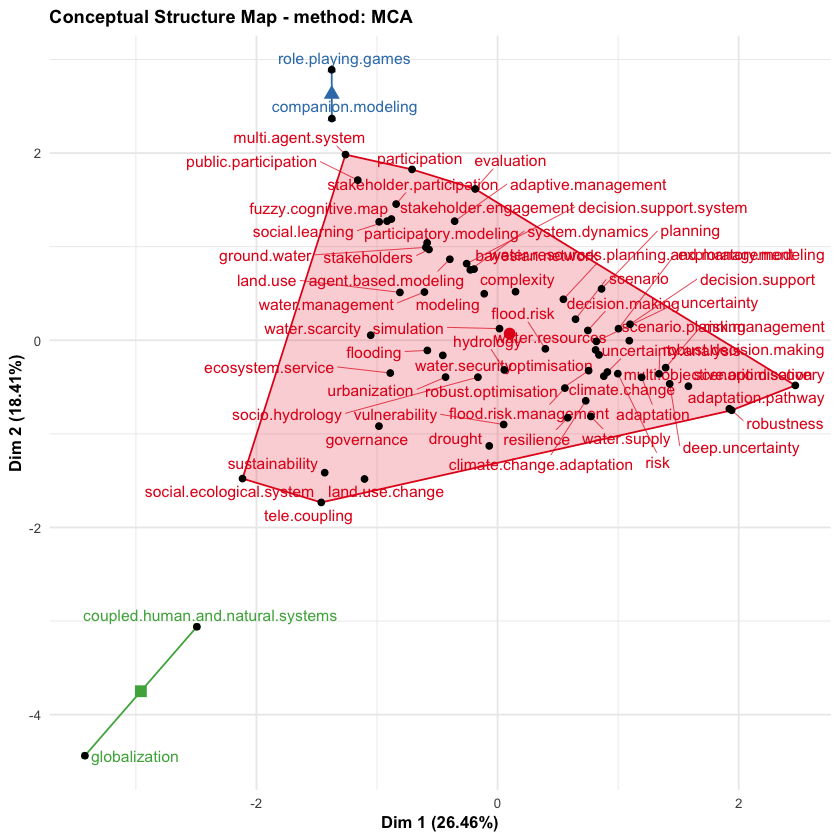

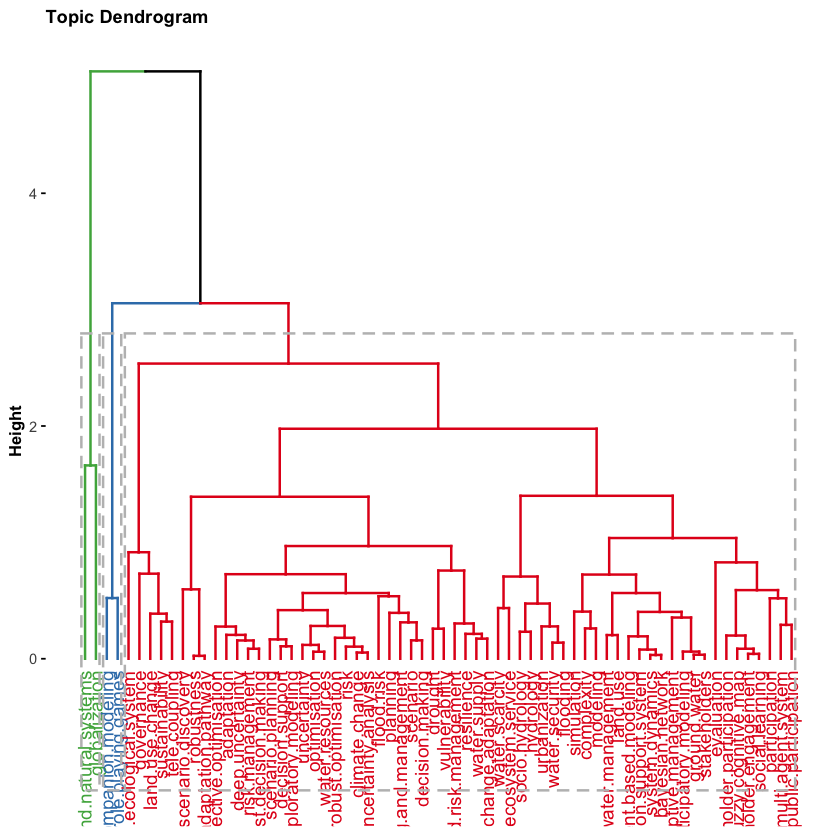

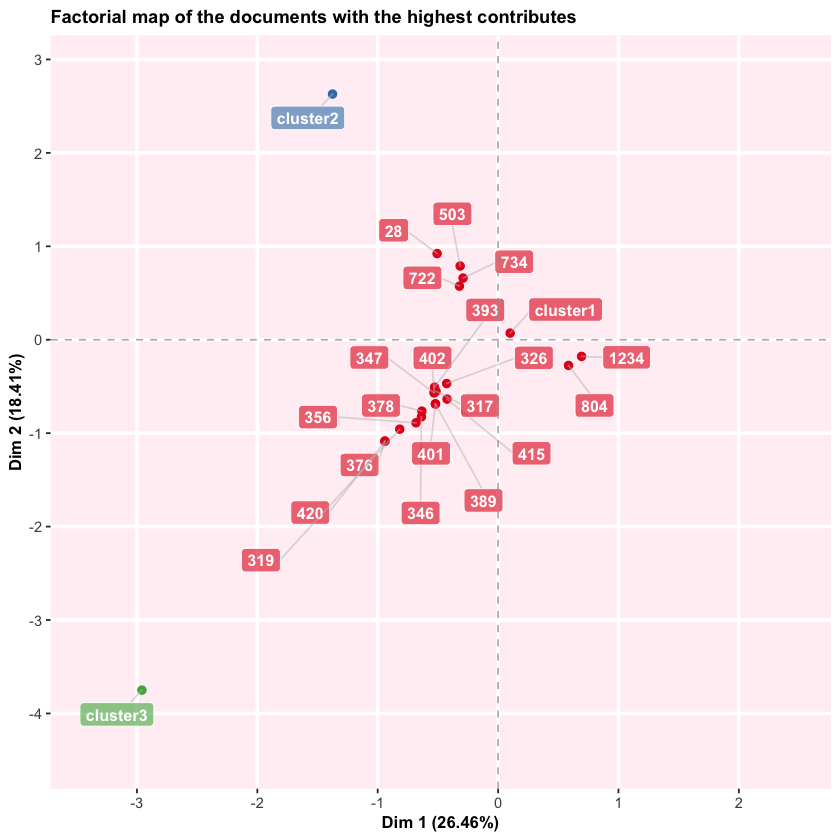

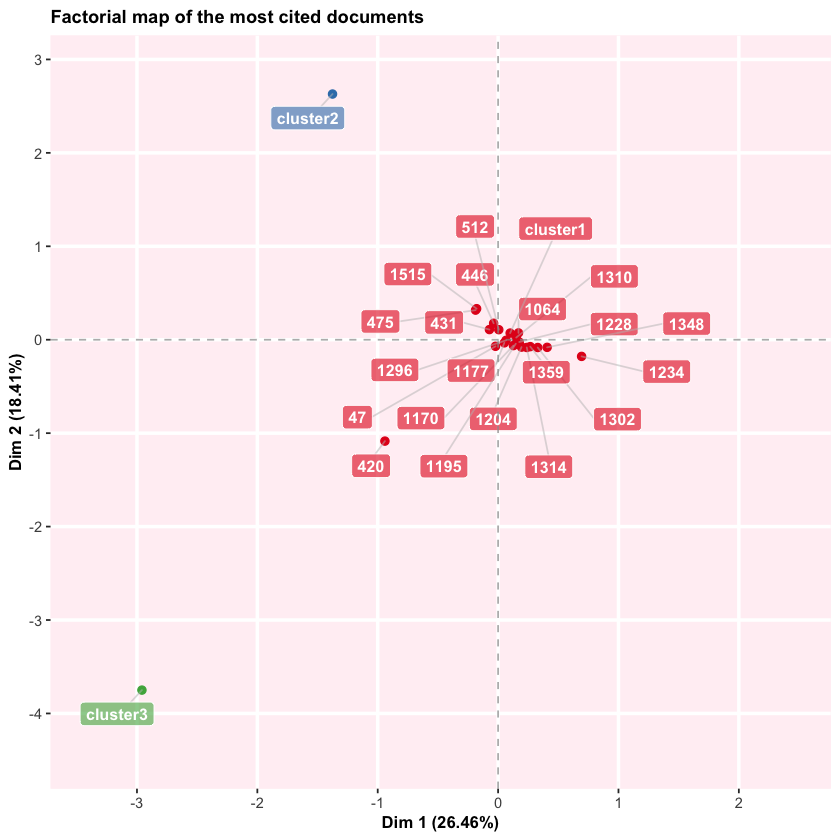

In [11]:
# Using CA method over Keywords Plus
CS <- conceptualStructure(M, field="DE", method="MCA", clust="3", k.max = 10, stemming=FALSE, minDegree=10, labelsize=10, documents=20)

## **Thematic Evolution Analysis**  

Co-word analysis draws clusters of keywords. They are considered as themes, whose density and centrality can be used in classifying themes and mapping in a two-dimensional diagram. Thematic map is a very intuitive plot and we can analyze themes according to the quadrant in which they are placed: (1) upper-right quadrant: motor-themes; (2) lower-right quadrant: basic themes; (3) lower-left quadrant: emerging or disappearing themes; (4) upper-left quadrant: very specialized/niche themes.  
The Thematic Map funciton creates a thematic map based on co-word network analysis and clustering. The methodology is inspired by the proposal of Cobo et al. (2011).

**First we generate Thematic Maps**

In [ ]:
res <- thematicMap(M, field = "DE", n = 2000, minfreq = 3, stemming = FALSE, size = 0.4, n.labels=3, repel = TRUE)
plot(res$map)

**Second we produce a Thematic Evolution Analysis**

In [ ]:
years = c(2005,2018)
nexus <- thematicEvolution(M, field = "DE", years=years, n = 10, minFreq = 7, size = 0.5, stemming = FALSE, n.labels = 1, repel = TRUE)
plot(nexus$map)

**From the Thematic Maps we can finally produce the Thematic Evolution Analysis**

In [ ]:
TE <- plotThematicEvolution(nexus$Nodes, nexus$Edges, measure = "inclusion", min.flow = 0.5)

## **Reference Publication Year Spectroscopy**  
rpys computes a Reference Publication Year Spectroscopy for detecting the Historical Roots of Research Fields. The method was introduced by Marx et al., 2014.

In [ ]:
years = c(2000,2018)
res <- rpys(M, sep = ";", timespan = years, graph = T)

## **Historical Direct Citation Network**  
The historiographic map (proposed by E. Garfield) represents a chronological networkmap of most relevant direct citations resulting from a bibliographic collection. We first create the historical citation network, and then we plot it.

In [ ]:
histResults <- histNetwork(M, min.citations = 10, sep = ";", verbose=FALSE)
net <- histPlot(histResults, n=50, size = 5, labelsize=7, verbose=FALSE)